In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set_context("poster")

%matplotlib inline

In [2]:
df = pd.DataFrame({
    "Samples": ["LMO v. 05-0(2n)", "LMO v. 01-0(4n)", "LMO v. 07-0(4n)"],    
    "match": [610546-1625, 466148-4274, 432340-3755],
    "mismatch": [1625-114, 4274-250, 3755-171],
    "unobserved allele": [114, 250, 171]
})

df = df.melt(id_vars="Samples", var_name="Genotype comparison", value_name="n")

group_sums = df[["Samples", "n"]].groupby(["Samples"], as_index=False).agg("sum").rename(columns={"n": "group_total"})

df = df.merge(group_sums, on="Samples").assign(frac = lambda x: x["n"] / x["group_total"]).drop("group_total", axis=1)

df

,Samples,Genotype comparison,n,frac
0,LMO v. 05-0(2n),match,608921,0.997338
1,LMO v. 05-0(2n),mismatch,1511,0.002475
2,LMO v. 05-0(2n),unobserved allele,114,0.000187
3,LMO v. 01-0(4n),match,461874,0.990831
4,LMO v. 01-0(4n),mismatch,4024,0.008632
5,LMO v. 01-0(4n),unobserved allele,250,0.000536
6,LMO v. 07-0(4n),match,428585,0.991315
7,LMO v. 07-0(4n),mismatch,3584,0.008290
8,LMO v. 07-0(4n),unobserved allele,171,0.000396


In [3]:
(df
 .query("`Genotype comparison` != 'match'")[["Samples", "n"]]
 .groupby("Samples", as_index=False)
 .agg("sum")
 .rename(columns={"n": "n mismatches"}))


,Samples,n mismatches
0,LMO v. 01-0(4n),4274
1,LMO v. 05-0(2n),1625
2,LMO v. 07-0(4n),3755


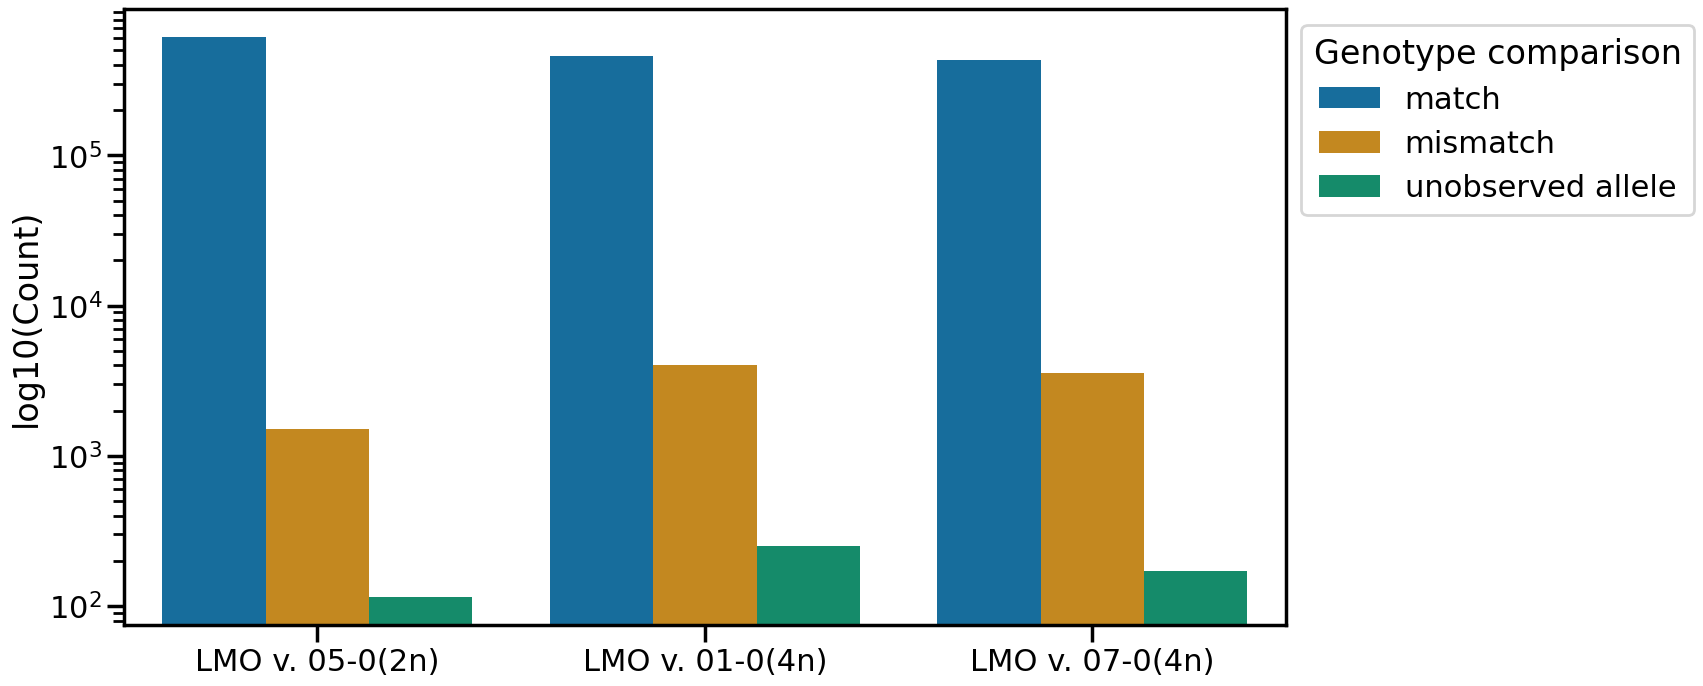

In [4]:
fig = plt.figure(figsize=(15, 8))

ax = sns.barplot(
    data=df,
    x="Samples",
    y="n",
    hue="Genotype comparison",
    palette="colorblind"
)

_ = ax.get_legend().set(bbox_to_anchor=(1,1))

_ = ax.set(
    xlabel="",
    yscale="log",
    ylabel="log10(Count)",
)

In [12]:
df = pd.DataFrame({
    "Samples": ["LMO v. 05-0(2n)", "LMO v. 01-0(4n)", "LMO v. 07-0(4n)"],    
    "match": [610546-1625, 466148-4274, 432340-3755],
    # "mismatch": [1625-114, 4274-250, 3755-171],
    "unobserved allele": [114, 250, 171]
})

df = df.melt(id_vars="Samples", var_name="Genotype comparison", value_name="n")

group_sums = df[["Samples", "n"]].groupby(["Samples"], as_index=False).agg("sum").rename(columns={"n": "group_total"})

df = df.merge(group_sums, on="Samples").assign(frac = lambda x: x["n"] / x["group_total"]).drop("group_total", axis=1)

df

,Samples,Genotype comparison,n,frac
0,LMO v. 05-0(2n),match,608921,0.999813
1,LMO v. 05-0(2n),unobserved allele,114,0.000187
2,LMO v. 01-0(4n),match,461874,0.999459
3,LMO v. 01-0(4n),unobserved allele,250,0.000541
4,LMO v. 07-0(4n),match,428585,0.999601
5,LMO v. 07-0(4n),unobserved allele,171,0.000399


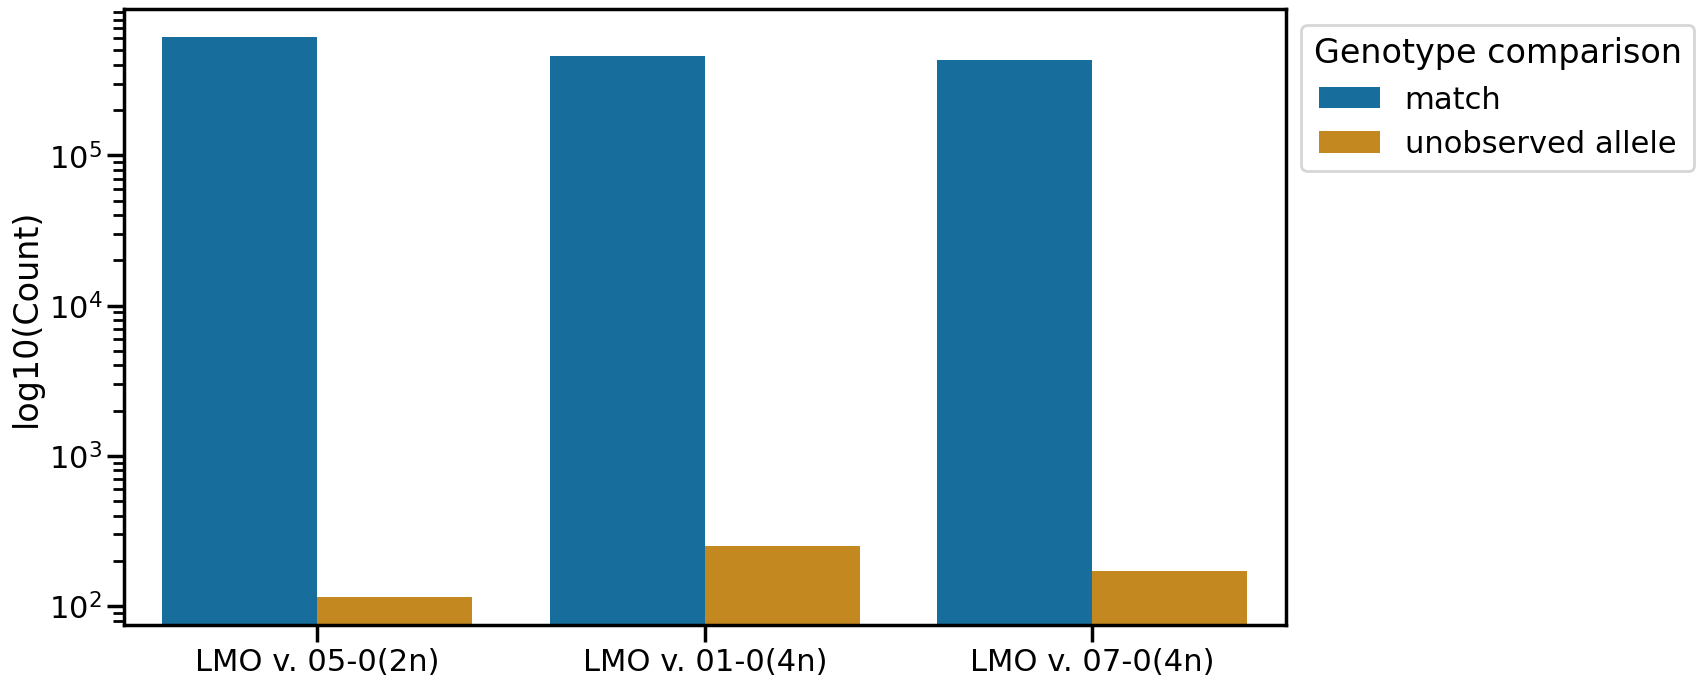

In [13]:
fig = plt.figure(figsize=(15, 8))

ax = sns.barplot(
    data=df,
    x="Samples",
    y="n",
    hue="Genotype comparison",
    palette="colorblind"
)

_ = ax.get_legend().set(bbox_to_anchor=(1,1))

_ = ax.set(
    xlabel="",
    yscale="log",
    ylabel="log10(Count)",
)

## Is the proportion of mismatches between the genotypes the same when comparing 2n -> 2n samples and 2n -> 4n samples?

In [5]:
perc_lmo_05 = (1511 + 114) / (608921 + 1511 + 114) * 100
perc_lmo_01 = (4024 + 250) / (461874 + 4024 + 250) * 100
perc_lmo_07 = (3584 + 171) / (428585 + 3584 + 171) * 100

print(perc_lmo_05, perc_lmo_01, perc_lmo_07)
print()
print(perc_lmo_01 / perc_lmo_05, perc_lmo_07 / perc_lmo_05)

0.26615521189230623 0.9168761852458875 0.8685293981588564

3.444892845520835 3.263243999558752


In [6]:
lmo_05_v_lmo_01 = np.array([
    [608921, 1511 + 114],
    [461874, 4024 + 250],
])

res = stats.chi2_contingency(
    lmo_05_v_lmo_01
)
print("LMO v. 05-0 versus LMO v. 01-0: P =", res.pvalue, "\n")


lmo_05_v_lmo_07 = np.array([
    [608921, 1511 + 114],
    [428585, 3584 + 171],
])

res = stats.chi2_contingency(
    lmo_05_v_lmo_07
)
print("LMO v. 05-0 versus LMO v. 01-0: P =", res.pvalue, "\n")

LMO v. 05-0 versus LMO v. 01-0: P = 0.0 

LMO v. 05-0 versus LMO v. 01-0: P = 0.0 



## Is the proportion of mismatches resulting from an unobserved allele between the genotypes the same when comparing 2n -> 2n samples and 2n -> 4n samples?

In [7]:
perc_lmo_05 = (114) / (608921 + 1511 + 114) * 100
perc_lmo_01 = (250) / (461874 + 4024 + 250) * 100
perc_lmo_07 = (171) / (428585 + 3584 + 171) * 100

print(perc_lmo_05, perc_lmo_01, perc_lmo_07)
print()
print(perc_lmo_01 / perc_lmo_05, perc_lmo_07 / perc_lmo_05)

0.018671811788137177 0.05363103563675056 0.03955220428366563

2.8722994985855705 2.1182842207521855


In [8]:
lmo_05_v_lmo_01 = np.array([
    [608921 + 1511, 114],
    [461874 + 4024, 250],
])

res = stats.chi2_contingency(
    lmo_05_v_lmo_01
)
print("LMO v. 05-0 versus LMO v. 01-0: P =", res.pvalue, "\n")


lmo_05_v_lmo_07 = np.array([
    [608921 + 1511, 114],
    [428585 + 3584, 171],
])

res = stats.chi2_contingency(
    lmo_05_v_lmo_07
)
print("LMO v. 05-0 versus LMO v. 01-0: P =", res.pvalue, "\n")

LMO v. 05-0 versus LMO v. 01-0: P = 2.3800271185783116e-22 

LMO v. 05-0 versus LMO v. 01-0: P = 3.067270186959289e-10 



## Out of the mismatched genotypes, is the proportion of mismatches resulting from an unobserved allele the same when comparing 2n -> 2n samples and 2n -> 4n samples?

In [9]:
print(114 / (1511 + 114) * 100)
print(250 / (4024 + 250) * 100)
print(171 / (3584 + 171) * 100)

7.015384615384615
5.84932147870847
4.553928095872171


In [10]:
lmo_05_v_lmo_01 = np.array([
    [1511, 114],
    [4024, 250],
])

res = stats.chi2_contingency(
    lmo_05_v_lmo_01
)
print("LMO v. 05-0 versus LMO v. 01-0: P =", res.pvalue, "\n")


lmo_05_v_lmo_07 = np.array([
    [1511, 114],
    [3584, 171],
])

res = stats.chi2_contingency(
    lmo_05_v_lmo_07
)
print("LMO v. 05-0 versus LMO v. 01-0: P =", res.pvalue, "\n")

LMO v. 05-0 versus LMO v. 01-0: P = 0.10909768339049189 

LMO v. 05-0 versus LMO v. 01-0: P = 0.0002782760043118975 



In [11]:
stats.chi2_contingency(
    lmo_05_v_lmo_07
)

Chi2ContingencyResult(statistic=13.211234594528689, pvalue=0.0002782760043118975, dof=1, expected_freq=array([[1538.91728625,   86.08271375],
       [3556.08271375,  198.91728625]]))